Initial analysis of the annotated data

In [2]:
import matplotlib.pyplot as plt
import os 
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np


DATA_PATH = os.path.join(os.getcwd(), "..", "data")

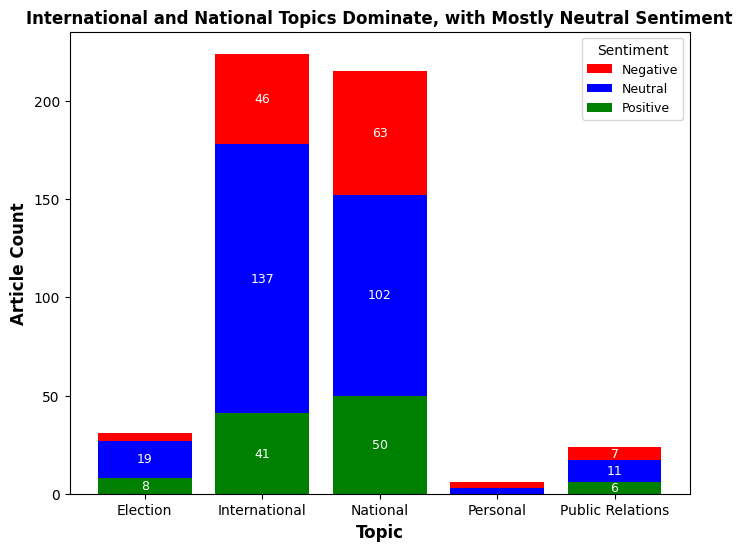

In [52]:
# Sentiment by Topics

import matplotlib.pyplot as plt
import pandas as pd
import os

df = pd.read_csv(os.path.join(DATA_PATH, "articles", "final_annotated_articles.tsv"), sep="\t", index_col=0)

topics = sorted(df['open_coding_topic'].unique())
count_pos = []
count_neutral = []
count_neg = []

for topic in topics:
    count_pos.append(len(df[(df["open_coding_topic"] == topic) & (df["sentiment"] == "Positive")]))
    count_neutral.append(len(df[(df["open_coding_topic"] == topic) & (df["sentiment"] == "Neutral")]))
    count_neg.append(len(df[(df["open_coding_topic"] == topic) & (df["sentiment"] == "Negative")]))

plt.figure(figsize=(8, 6))   # width=8 inches, height=6 inches
# Plot stacked bars
bar1 = plt.bar(topics, count_pos, label='Positive', color="green")
bar2 = plt.bar(topics, count_neutral, bottom=count_pos, label='Neutral', color="blue")
bar3 = plt.bar(topics, count_neg, bottom=[i+j for i, j in zip(count_pos, count_neutral)], label='Negative', color="red")

# Add labels
# Add labels with staggered arrows for small bars
for bar_group in [bar1, bar2, bar3]:
    for i, bar in enumerate(bar_group.patches):
        height = bar.get_height()
        if height == 0:
            continue

        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_y()

        if height > 5:
            plt.text(x, y + height / 2,
                     f'{int(height)}', ha='center', va='center',
                     fontsize=9, color='white')


plt.xlabel("Topic", fontweight='bold', fontsize=12)
plt.ylabel("Article Count", fontweight='bold', fontsize=12)
# Get current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Reorder: Negative, Neutral, Positive
order = [2, 1, 0]  # indices correspond to current order
plt.legend(
    [handles[idx] for idx in order],
    [labels[idx] for idx in order],
    title="Sentiment",
    title_fontsize=10,
    fontsize=9,
    loc="upper right",
    frameon=True
)

#plt.legend(title="Sentiment", title_fontsize=10, fontsize=9, loc="upper right", frameon=True)
plt.title("International and National Topics Dominate, with Mostly Neutral Sentiment", fontweight='bold', fontsize=12)
#plt.tight_layout()
plt.savefig(os.path.join("..", "data", "visualizations", "articles_by_topic.png"), bbox_inches="tight", pad_inches=0.1, dpi=300)
plt.show()


In [33]:
from scipy.stats import binomtest

# Suppose you already have your dataframe:
# columns: [open_coding_topic, sentiment]
df = pd.read_csv(os.path.join(DATA_PATH, "articles", "final_annotated_articles.tsv"), sep="\t", index_col=0)
topics = df['open_coding_topic'].unique()

for topic in topics:
    subset = df[(df['open_coding_topic'] == topic) & (df["sentiment"].isin(["Positive", "Negative"]))]

    n = len(subset)
    k = (subset['sentiment'] == "Positive").sum()  # number of positive posts
    p0 = 0.5  # expected probability of positive sentiment

    result = binomtest(k=k, n=n, p=p0, alternative='two-sided')
    print(f"Topic: {topic}")
    print(f"  Positive count: {k}/{n}")
    print(f"  p-value = {result.pvalue:.4f}\n")


Topic: Personal
  Positive count: 0/3
  p-value = 0.2500

Topic: International
  Positive count: 41/87
  p-value = 0.6683

Topic: Election
  Positive count: 8/12
  p-value = 0.3877

Topic: National
  Positive count: 50/113
  p-value = 0.2589

Topic: Public Relations
  Positive count: 6/13
  p-value = 1.0000



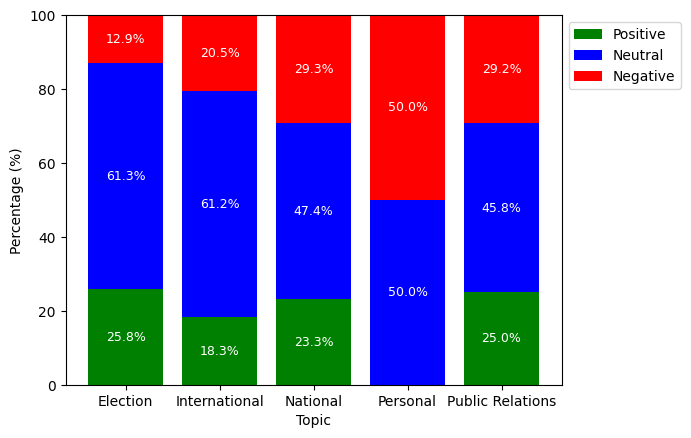

In [4]:
# Sentiment by topics normalized
df = pd.read_csv(os.path.join(DATA_PATH, "articles", "final_annotated_articles.tsv"), sep="\t")

topics = df['open_coding_topic'].unique()
topics.sort()

count_pos = []
count_neutral = []
count_neg = []

for topic in topics:
    pos = len(df[(df["open_coding_topic"] == topic) & (df["sentiment"] == "Positive")])
    neu = len(df[(df["open_coding_topic"] == topic) & (df["sentiment"] == "Neutral")])
    neg = len(df[(df["open_coding_topic"] == topic) & (df["sentiment"] == "Negative")])

    total = pos + neu + neg

    # Normalize to percentage
    count_pos.append(pos / total * 100)
    count_neutral.append(neu / total * 100)
    count_neg.append(neg / total * 100)

# Plot normalized stacked bars
bar1 = plt.bar(topics, count_pos, label='Positive', color='green')
bar2 = plt.bar(topics, count_neutral, bottom=count_pos, label='Neutral', color='blue')
bar3 = plt.bar(topics, count_neg, bottom=[i+j for i,j in zip(count_pos, count_neutral)], 
               label='Negative', color='red')

# Add labels to each segment
for bar in [bar1, bar2, bar3]:
    for sub_bar in bar.patches:
        height = sub_bar.get_height()
        if height == 0:
            continue
        x = sub_bar.get_x() + sub_bar.get_width() / 2
        y = sub_bar.get_y() + height / 2
        plt.text(x, y, f"{height:.1f}%", ha='center', va='center', fontsize=9, color='white')

plt.xlabel("Topic")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


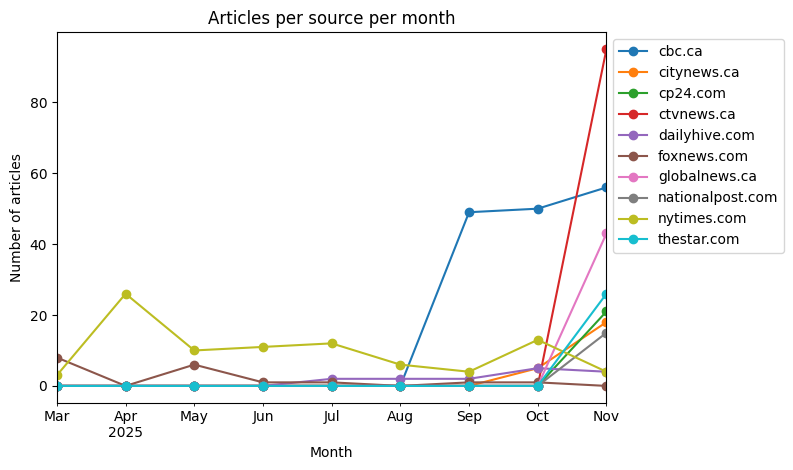

source,cbc.ca,citynews.ca,cp24.com,ctvnews.ca,dailyhive.com,foxnews.com,globalnews.ca,nationalpost.com,nytimes.com,thestar.com,Total
month,,,,,,,,,,,
2025-03-01 00:00:00,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,3.0,0.0,11.0
2025-04-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,26.0
2025-05-01 00:00:00,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,10.0,0.0,16.0
2025-06-01 00:00:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0,0.0,12.0
2025-07-01 00:00:00,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,12.0,0.0,15.0
2025-08-01 00:00:00,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,0.0,8.0
2025-09-01 00:00:00,49.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,4.0,0.0,56.0
2025-10-01 00:00:00,50.0,5.0,0.0,0.0,5.0,1.0,0.0,0.0,13.0,0.0,74.0
2025-11-01 00:00:00,56.0,18.0,21.0,95.0,4.0,0.0,43.0,15.0,4.0,26.0,282.0


In [5]:
# sources over time, plot and table
df["date"] = df["date"].str.slice(0, 10)

dt = pd.to_datetime(df["date"], format="%Y-%m-%d", errors="coerce")

df["month"] = dt[~dt.isna()].dt.to_period("M").dt.to_timestamp()

source_counts = (
    df.groupby(["month", "source"])
      .size()
      .reset_index(name="count")
      .sort_values("month")
)

pivot = source_counts.pivot(index="month", columns="source", values="count").fillna(0)

ax = pivot.plot(marker="o")
ax.set_xlabel("Month")
ax.set_ylabel("Number of articles")
ax.set_title("Articles per source per month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

pivot_with_totals = pivot.copy()
pivot_with_totals["Total"] = pivot_with_totals.sum(axis=1)
pivot_with_totals.loc["Total"] = pivot_with_totals.sum(axis=0)
pivot_with_totals

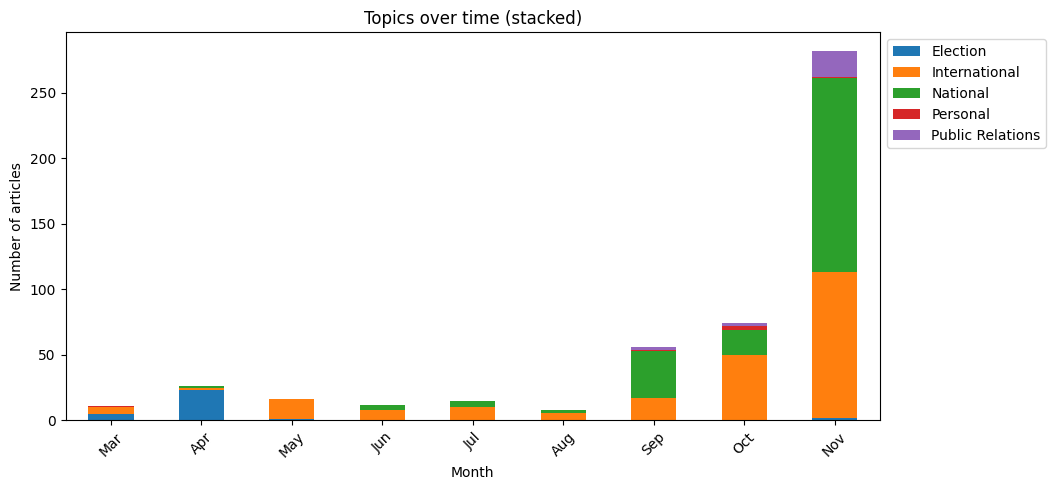

open_coding_topic,Election,International,National,Personal,Public Relations
month,,,,,
Mar,5.0,5.0,0.0,1.0,0.0
Apr,23.0,2.0,1.0,0.0,0.0
May,1.0,15.0,0.0,0.0,0.0
Jun,0.0,8.0,4.0,0.0,0.0
Jul,0.0,10.0,5.0,0.0,0.0
Aug,0.0,6.0,2.0,0.0,0.0
Sep,0.0,17.0,36.0,1.0,2.0
Oct,0.0,50.0,19.0,3.0,2.0
Nov,2.0,111.0,148.0,1.0,20.0


In [6]:
# topics over time

topic_counts = (
    df.groupby(["month", "open_coding_topic"])
      .size()
      .reset_index(name="count")
      .sort_values("month")
)

topic_pivot = topic_counts.pivot(
    index="month",
    columns="open_coding_topic",
    values="count"
).fillna(0)

topic_pivot.index = topic_pivot.index.strftime("%b")  # 'Mar', 'Apr', ...

ax = topic_pivot.plot(kind="bar", stacked=True, figsize=(9,5))
ax.set_xlabel("Month")
ax.set_ylabel("Number of articles")
ax.set_title("Topics over time (stacked)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

topic_pivot


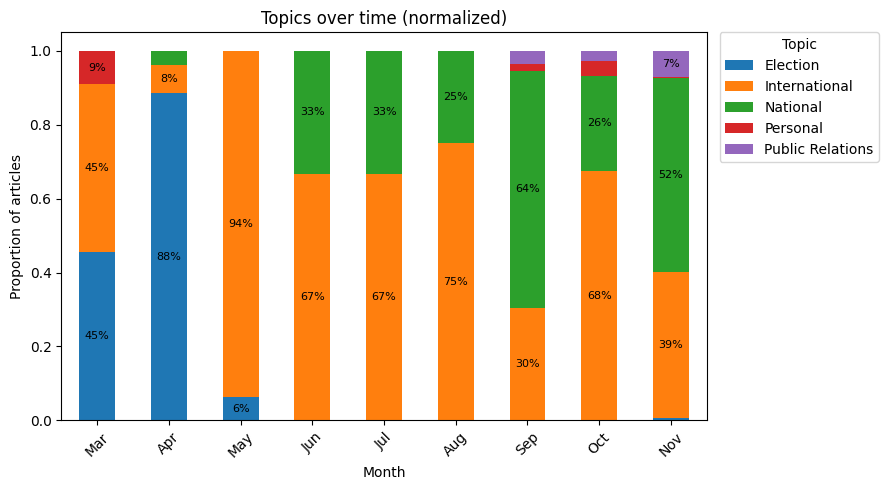

In [7]:
# topics over time normalized

# Sum across topics for each month
row_sums = topic_pivot.sum(axis=1)

# Proportions (0–1)
topic_pivot_prop = topic_pivot.div(row_sums, axis=0).fillna(0)

# Copy for plotting with pretty month labels
topic_pivot_prop_plot = topic_pivot_prop.copy()

# Or percentages (0–100)
topic_pivot_pct = topic_pivot_prop * 100

ax = topic_pivot_prop_plot.plot(kind="bar", stacked=True, figsize=(9,5))
ax.set_xlabel("Month")
ax.set_ylabel("Proportion of articles")
ax.set_title("Topics over time (normalized)")
ax.legend(
    title="Topic",
    bbox_to_anchor=(1.02, 1),   # just outside right
    loc="upper left",
    borderaxespad=0.
)

# add % labels
for i, month in enumerate(topic_pivot_prop_plot.index):
    cum_height = 0  # running bottom of the stack
    for topic in topic_pivot_prop_plot.columns:
        val = topic_pivot_prop_plot.loc[month, topic]
        if val <= 0:
            continue
        if val >= 0.05:  # only label if not tiny
            ax.text(
                i,
                cum_height + val / 2,
                f"{val * 100:.0f}%",    # text (percent)
                ha="center",
                va="center",
                fontsize=8
            )
        cum_height += val

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 1. Convert to percentages per month (table, keep real month index)
topic_pct = (
    topic_pivot
    .div(topic_pivot.sum(axis=1), axis=0)
    .fillna(0) * 100
).round(1)


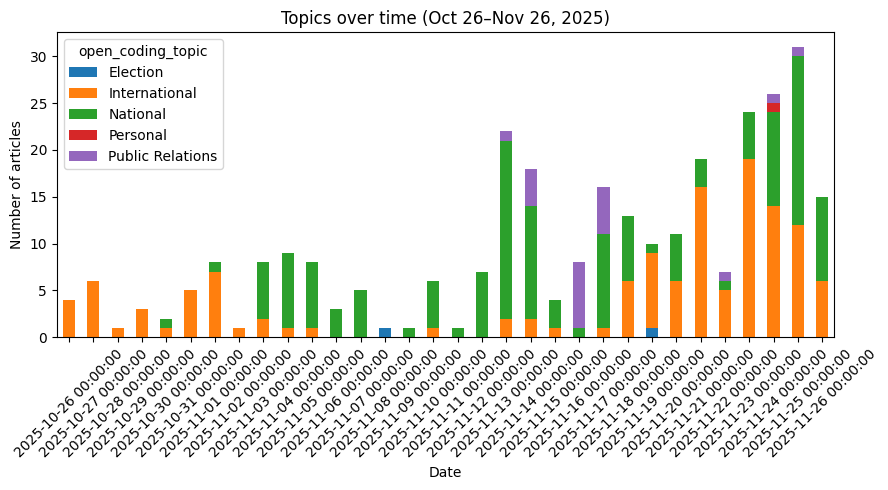

In [8]:
# --- Topics over time, Oct 26–Nov 26, 2025 ---

df["date_day"] = dt  

start = pd.Timestamp("2025-10-26")
end   = pd.Timestamp("2025-11-26")

mask = (df["date_day"] >= start) & (df["date_day"] <= end)
df_window = df[mask].copy()

topic_counts_win = (
    df_window.groupby(["date_day", "open_coding_topic"])
             .size()
             .reset_index(name="count")
             .sort_values("date_day")
)

topic_pivot_win = topic_counts_win.pivot(
    index="date_day",
    columns="open_coding_topic",
    values="count"
).fillna(0)

# stacked line / area plot (counts)
ax = topic_pivot_win.plot(kind="bar", stacked=True, figsize=(9, 5))
ax.set_xlabel("Date")
ax.set_ylabel("Number of articles")
ax.set_title("Topics over time (Oct 26–Nov 26, 2025)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


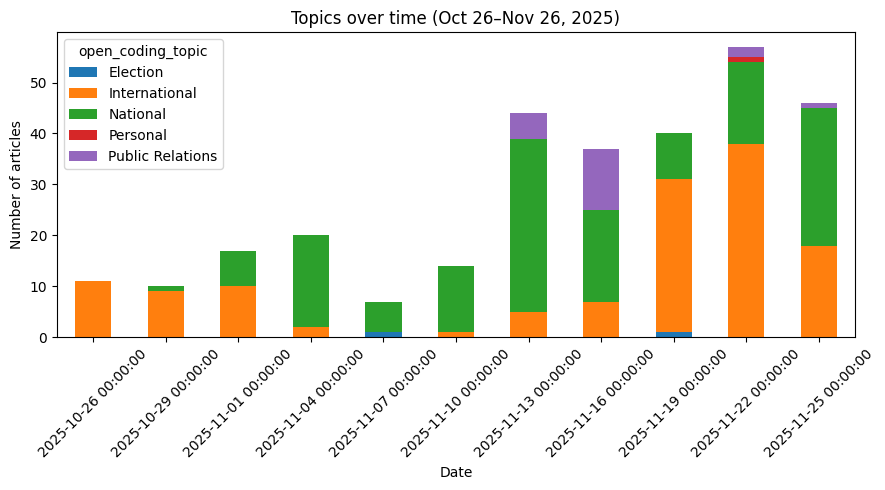

In [9]:
# topics over time grouped into 3 day chunks
# --- Topics over time, Oct 26–Nov 26, 2025 ---

df["date_day"] = dt  

start = pd.Timestamp("2025-10-26")
end   = pd.Timestamp("2025-11-26")

mask = (df["date_day"] >= start) & (df["date_day"] <= end)
df_window = df[mask].copy()

offset_days = (df_window["date_day"] - start).dt.days
df_window["three_day_bin"] = start + pd.to_timedelta((offset_days // 3) * 3, unit="D")

topic_counts_win = (
    df_window.groupby(["three_day_bin", "open_coding_topic"])
             .size()
             .reset_index(name="count")
             .sort_values("three_day_bin")
)

topic_pivot_win = topic_counts_win.pivot(
    index="three_day_bin",
    columns="open_coding_topic",
    values="count"
).fillna(0)

# stacked line / area plot (counts)
ax = topic_pivot_win.plot(kind="bar", stacked=True, figsize=(9, 5))
ax.set_xlabel("Date")
ax.set_ylabel("Number of articles")
ax.set_title("Topics over time (Oct 26–Nov 26, 2025)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


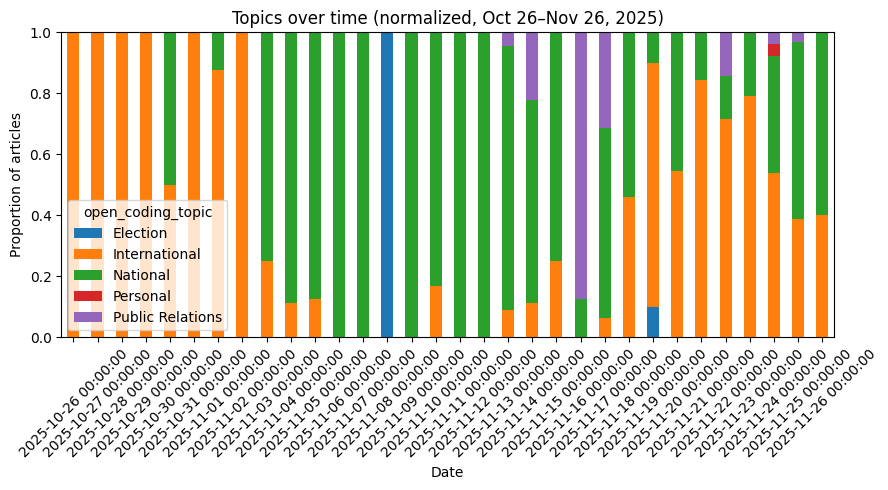

In [10]:
# Topics over time normalized
# Counts per (day, topic) in the window
topic_counts_win = (
    df_window.groupby(["date_day", "open_coding_topic"])
             .size()
             .reset_index(name="count")
             .sort_values("date_day")
)

# Day × topic table
topic_pivot_win = topic_counts_win.pivot(
    index="date_day",
    columns="open_coding_topic",
    values="count"
).fillna(0)

# Normalize per day (rows sum to 1)
topic_prop_win = topic_pivot_win.div(topic_pivot_win.sum(axis=1), axis=0).fillna(0)

# Normalized stacked area plot
ax = topic_prop_win.plot(kind="bar", stacked=True, figsize=(9, 5))
ax.set_xlabel("Date")
ax.set_ylabel("Proportion of articles")
ax.set_title("Topics over time (normalized, Oct 26–Nov 26, 2025)")
ax.set_ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



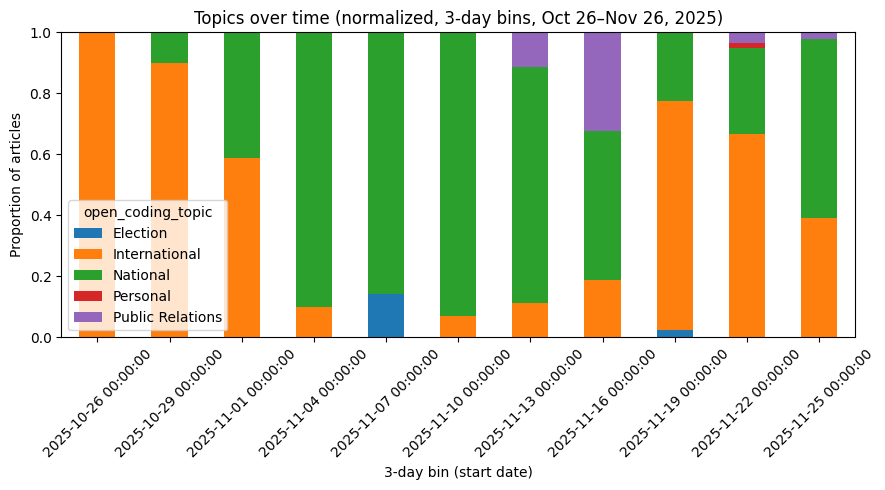

In [11]:
# Topics over time normalized grouped into 3 day chunks
# 1. Make 3-day bins (if you haven't already)
offset_days = (df_window["date_day"] - start).dt.days
df_window["three_day_bin"] = start + pd.to_timedelta((offset_days // 3) * 3, unit="D")

# 2. Count per (3-day bin, topic)
topic_counts_3d = (
    df_window.groupby(["three_day_bin", "open_coding_topic"])
             .size()
             .reset_index(name="count")
             .sort_values("three_day_bin")
)

topic_pivot_3d = topic_counts_3d.pivot(
    index="three_day_bin",
    columns="open_coding_topic",
    values="count"
).fillna(0)

# 3. Normalize per 3-day bin (rows sum to 1)
topic_prop_3d = topic_pivot_3d.div(topic_pivot_3d.sum(axis=1), axis=0).fillna(0)

# 4. Normalized stacked area (3-day chunks)
ax = topic_prop_3d.plot(kind="bar", stacked=True, figsize=(9, 5))
ax.set_xlabel("3-day bin (start date)")
ax.set_ylabel("Proportion of articles")
ax.set_title("Topics over time (normalized, 3-day bins, Oct 26–Nov 26, 2025)")
ax.set_ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



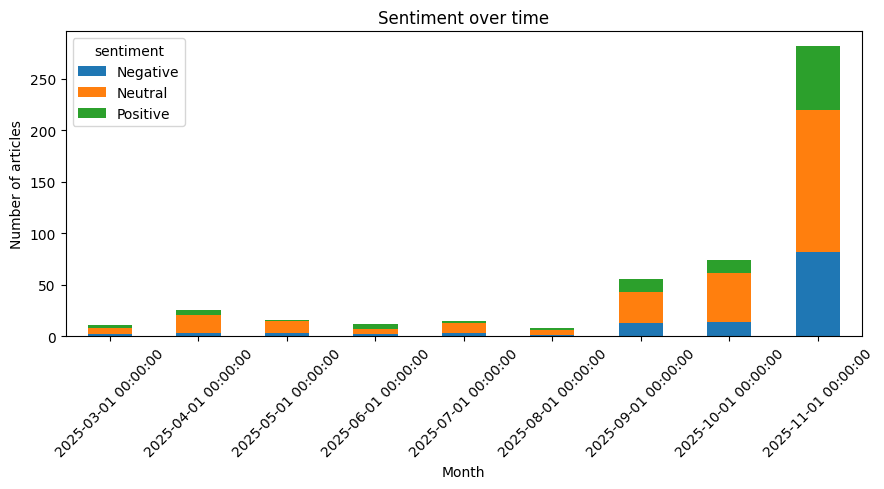

sentiment,Negative,Neutral,Positive
month,,,
2025-03-01,2,6,3
2025-04-01,3,18,5
2025-05-01,3,12,1
2025-06-01,2,5,5
2025-07-01,3,10,2
2025-08-01,1,5,2
2025-09-01,13,30,13
2025-10-01,14,48,12
2025-11-01,82,138,62


In [12]:
# sentiment over time
sent_counts = (
    df.groupby(["month", "sentiment"])
      .size()
      .reset_index(name="count")
      .sort_values("month")
)

sent_pivot = sent_counts.pivot(
    index="month",
    columns="sentiment",
    values="count"
).fillna(0)

ax = sent_pivot.plot(kind="bar", stacked=True, figsize=(9, 5))
ax.set_xlabel("Month")
ax.set_ylabel("Number of articles")
ax.set_title("Sentiment over time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sent_pivot  # data table: month × sentiment counts


In [13]:
# sentiment over time normalized
sent_prop = sent_pivot.div(sent_pivot.sum(axis=1), axis=0).fillna(0)
sent_pct = (sent_prop * 100).round(1)

ax = sent_prop.plot(kind="bar", stacked=True, figsize=(9, 5))
ax.set_xlabel("Month")
ax.set_ylabel("Proportion of articles")
ax.set_title("Sentiment over time (normalized)")
ax.set_ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sent_pct  # table of percentages per month


KeyboardInterrupt: 

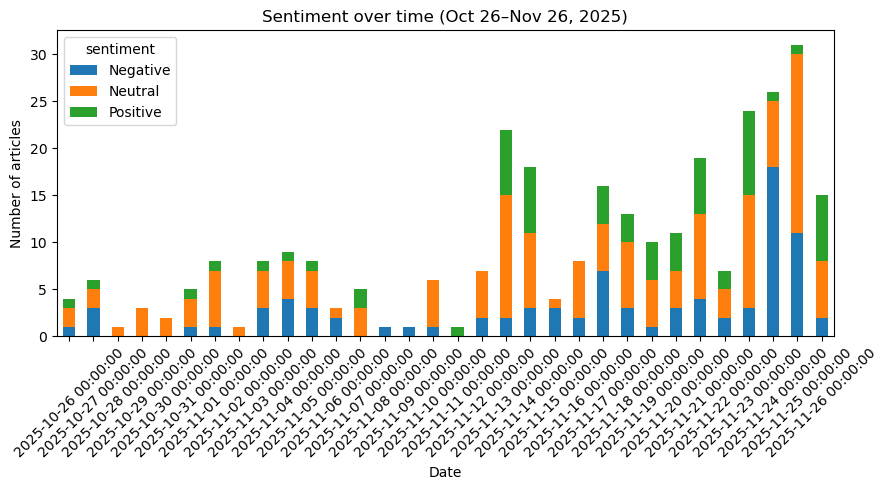

sentiment,Negative,Neutral,Positive
date_day,,,
2025-10-26,1.0,2.0,1.0
2025-10-27,3.0,2.0,1.0
2025-10-28,0.0,1.0,0.0
2025-10-29,0.0,3.0,0.0
2025-10-30,0.0,2.0,0.0
2025-10-31,1.0,3.0,1.0
2025-11-01,1.0,6.0,1.0
2025-11-02,0.0,1.0,0.0
2025-11-03,3.0,4.0,1.0


In [ ]:
# sentiment over time from october 26- november 26

# make sure we have a daily datetime column
df["date_day"] = dt

start = pd.Timestamp("2025-10-26")
end   = pd.Timestamp("2025-11-26")

mask = (df["date_day"] >= start) & (df["date_day"] <= end)
df_sent_window = df[mask].copy()

# counts per (day, sentiment)
sent_counts_win = (
    df_sent_window.groupby(["date_day", "sentiment"])
                  .size()
                  .reset_index(name="count")
                  .sort_values("date_day")
)

sent_pivot_win = sent_counts_win.pivot(
    index="date_day",
    columns="sentiment",
    values="count"
).fillna(0)

# stacked bar of counts
ax = sent_pivot_win.plot(kind="bar", stacked=True, figsize=(9, 5))
ax.set_xlabel("Date")
ax.set_ylabel("Number of articles")
ax.set_title("Sentiment over time (Oct 26–Nov 26, 2025)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sent_pivot_win  # table: day × sentiment counts


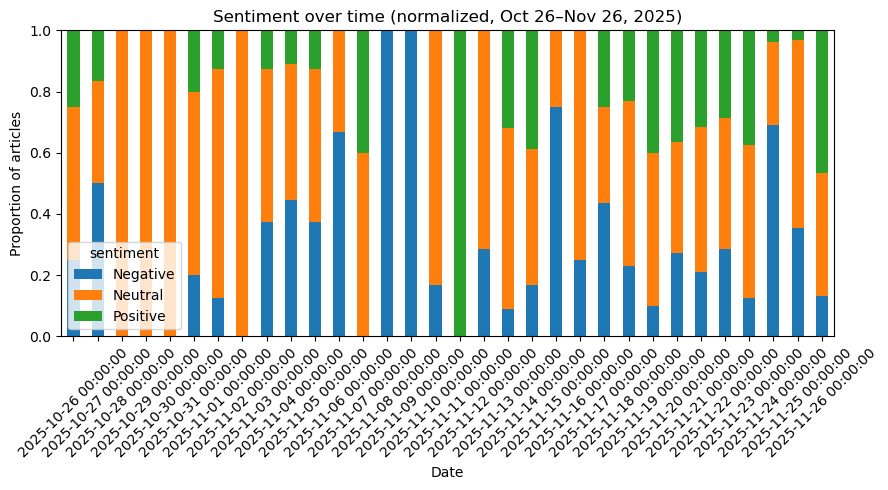

sentiment,Negative,Neutral,Positive
date_day,,,
2025-10-26,25.0,50.0,25.0
2025-10-27,50.0,33.3,16.7
2025-10-28,0.0,100.0,0.0
2025-10-29,0.0,100.0,0.0
2025-10-30,0.0,100.0,0.0
2025-10-31,20.0,60.0,20.0
2025-11-01,12.5,75.0,12.5
2025-11-02,0.0,100.0,0.0
2025-11-03,37.5,50.0,12.5


In [ ]:
# sentiment over time from october 26- november 26 normalized
# make sure we have a daily datetime column
df["date_day"] = dt  # dt = pd.to_datetime(df["date"], ...) from earlier

start = pd.Timestamp("2025-10-26")
end   = pd.Timestamp("2025-11-26")

mask = (df["date_day"] >= start) & (df["date_day"] <= end)
df_sent_window = df[mask].copy()

# counts per (day, sentiment)
sent_counts_win = (
    df_sent_window.groupby(["date_day", "sentiment"])
                  .size()
                  .reset_index(name="count")
                  .sort_values("date_day")
)

sent_pivot_win = sent_counts_win.pivot(
    index="date_day",
    columns="sentiment",
    values="count"
).fillna(0)

# normalize per day (rows sum to 1)
sent_prop_win = sent_pivot_win.div(sent_pivot_win.sum(axis=1), axis=0).fillna(0)

# normalized stacked bar
ax = sent_prop_win.plot(kind="bar", stacked=True, figsize=(9, 5))
ax.set_xlabel("Date")
ax.set_ylabel("Proportion of articles")
ax.set_title("Sentiment over time (normalized, Oct 26–Nov 26, 2025)")
ax.set_ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# data table of percentages (optional)
(sent_prop_win * 100).round(1)


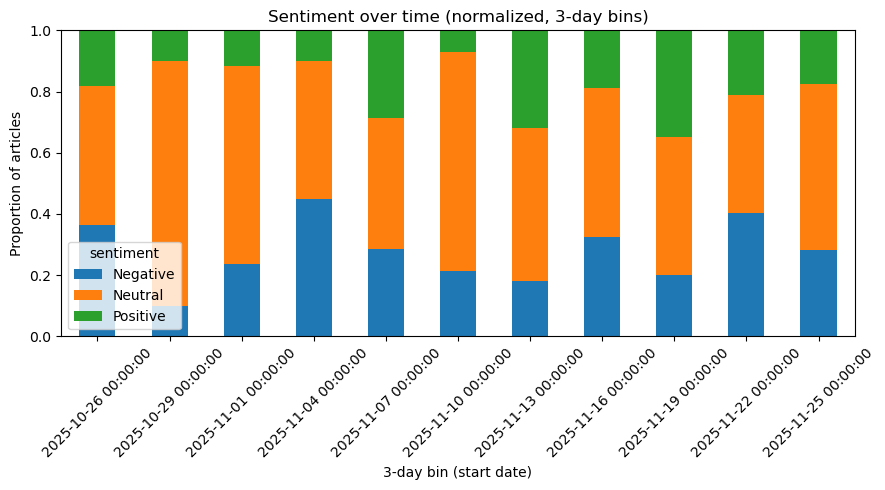

sentiment,Negative,Neutral,Positive
three_day_bin,,,
2025-10-26,36.4,45.5,18.2
2025-10-29,10.0,80.0,10.0
2025-11-01,23.5,64.7,11.8
2025-11-04,45.0,45.0,10.0
2025-11-07,28.6,42.9,28.6
2025-11-10,21.4,71.4,7.1
2025-11-13,18.2,50.0,31.8
2025-11-16,32.4,48.6,18.9
2025-11-19,20.0,45.0,35.0


In [ ]:
# sentiment over time from october 26- november 26 normalized grouped into 3 day chunks
# Sentiment over time, normalized, 3-day bins (using existing df_window + three_day_bin)

sent_counts_3d = (
    df_window.groupby(["three_day_bin", "sentiment"])
             .size()
             .reset_index(name="count")
             .sort_values("three_day_bin")
)

sent_pivot_3d = sent_counts_3d.pivot(
    index="three_day_bin",
    columns="sentiment",
    values="count"
).fillna(0)

# normalize rows → proportions per 3-day bin
sent_prop_3d = sent_pivot_3d.div(sent_pivot_3d.sum(axis=1), axis=0).fillna(0)

# stacked bar (change kind="area" if you want a stacked line/area instead)
ax = sent_prop_3d.plot(kind="bar", stacked=True, figsize=(9, 5))
ax.set_xlabel("3-day bin (start date)")
ax.set_ylabel("Proportion of articles")
ax.set_title("Sentiment over time (normalized, 3-day bins)")
ax.set_ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# optional: table of percentages
(sent_prop_3d * 100).round(1)


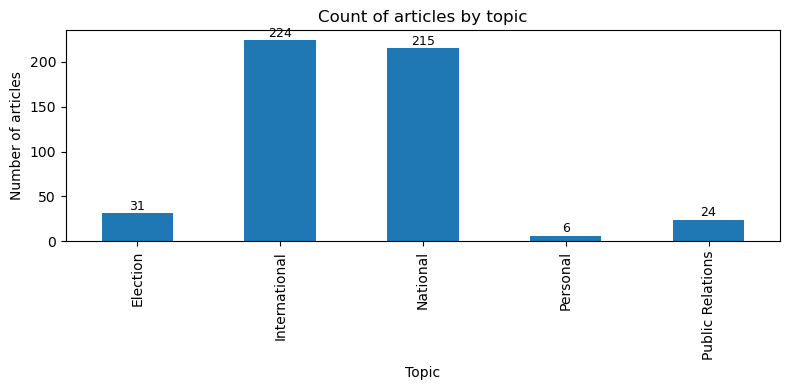

open_coding_topic
Election             31
International       224
National            215
Personal              6
Public Relations     24
Name: count, dtype: int64

In [ ]:
# Bar plot of topics
topic_counts = (
    df["open_coding_topic"]
    .value_counts()
    .sort_index()        # or .sort_values(ascending=False) if you prefer
)

ax = topic_counts.plot(kind="bar", figsize=(8, 4))
ax.set_xlabel("Topic")
ax.set_ylabel("Number of articles")
ax.set_title("Count of articles by topic")

# add labels on top of bars
for i, v in enumerate(topic_counts.values):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

topic_counts  # data table of counts


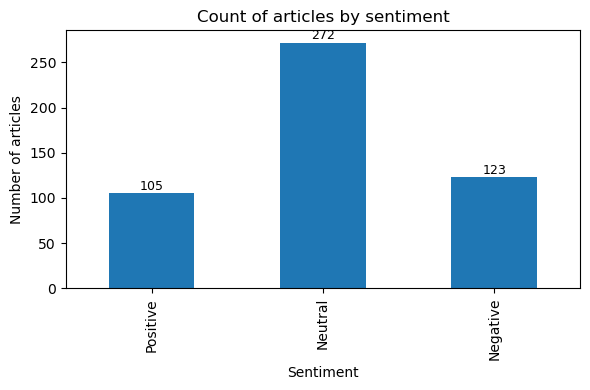

sentiment
Positive    105
Neutral     272
Negative    123
Name: count, dtype: int64

In [ ]:
# Bar plot of sentiment
sent_counts = (
    df["sentiment"]
      .value_counts()
      .reindex(["Positive", "Neutral", "Negative"])  # keeps a nice order
)

ax = sent_counts.plot(kind="bar", figsize=(6, 4))
ax.set_xlabel("Sentiment")
ax.set_ylabel("Number of articles")
ax.set_title("Count of articles by sentiment")

# add labels on top of bars
for i, v in enumerate(sent_counts.values):
    if pd.isna(v):
        continue
    ax.text(i, v + 0.5, int(v), ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

sent_counts  # table of counts


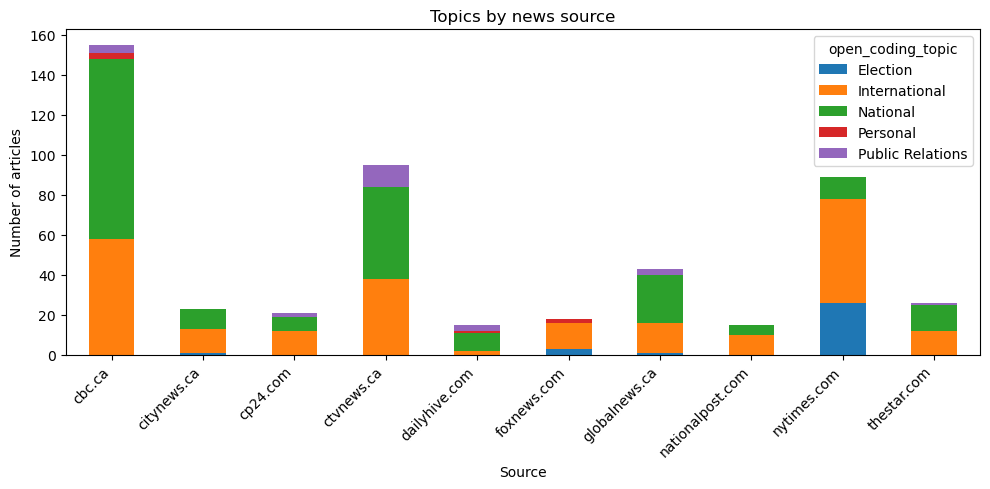

open_coding_topic,Election,International,National,Personal,Public Relations
source,,,,,
cbc.ca,0.0,58.0,90.0,3.0,4.0
citynews.ca,1.0,12.0,10.0,0.0,0.0
cp24.com,0.0,12.0,7.0,0.0,2.0
ctvnews.ca,0.0,38.0,46.0,0.0,11.0
dailyhive.com,0.0,2.0,9.0,1.0,3.0
foxnews.com,3.0,13.0,0.0,2.0,0.0
globalnews.ca,1.0,15.0,24.0,0.0,3.0
nationalpost.com,0.0,10.0,5.0,0.0,0.0
nytimes.com,26.0,52.0,11.0,0.0,0.0


In [ ]:
# Topics by news sources
# counts of topics per source
topic_source_counts = (
    df.groupby(["source", "open_coding_topic"])
      .size()
      .reset_index(name="count")
)

topic_source_pivot = topic_source_counts.pivot(
    index="source",
    columns="open_coding_topic",
    values="count"
).fillna(0)

# stacked bar plot: one bar per source, colored by topic
ax = topic_source_pivot.plot(kind="bar", stacked=True, figsize=(10, 5))
ax.set_xlabel("Source")
ax.set_ylabel("Number of articles")
ax.set_title("Topics by news source")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# data table
topic_source_pivot


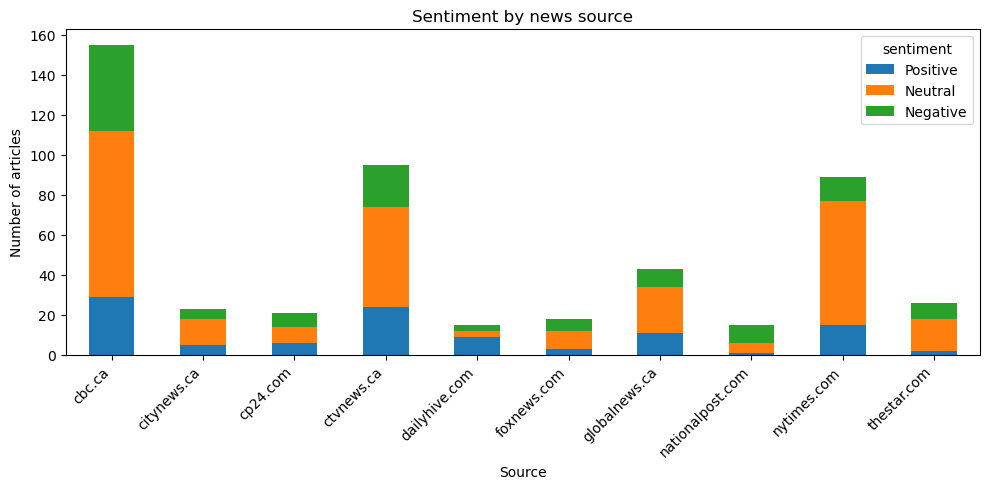

sentiment,Positive,Neutral,Negative
source,,,
cbc.ca,29,83,43
citynews.ca,5,13,5
cp24.com,6,8,7
ctvnews.ca,24,50,21
dailyhive.com,9,3,3
foxnews.com,3,9,6
globalnews.ca,11,23,9
nationalpost.com,1,5,9
nytimes.com,15,62,12


In [ ]:
# sentiment by news sources

sent_source_counts = (
    df.groupby(["source", "sentiment"])
      .size()
      .reset_index(name="count")
)

sent_source_pivot = sent_source_counts.pivot(
    index="source",
    columns="sentiment",
    values="count"
).fillna(0)

# optional: order columns
sent_source_pivot = sent_source_pivot.reindex(columns=["Positive", "Neutral", "Negative"])

ax = sent_source_pivot.plot(kind="bar", stacked=True, figsize=(10, 5))
ax.set_xlabel("Source")
ax.set_ylabel("Number of articles")
ax.set_title("Sentiment by news source")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# data table
sent_source_pivot


In [ ]:
chi2, p, dof, expected = chi2_contingency(sent_source_pivot.values)

print("Sentiment × Source chi-squared:")
print(f"  χ² = {chi2:.2f}")
print(f"  df = {dof}")
print(f"  p  = {p:.4g}")

# since p < 0.05 sentiment depends on news source

Sentiment × Source chi-squared:
  χ² = 42.39
  df = 18
  p  = 0.0009746


In [ ]:
# >= 2 is strong in that it has more than expected
expected_df = pd.DataFrame(
    expected,
    index=sent_source_pivot.index,
    columns=sent_source_pivot.columns
)

residuals = (sent_source_pivot - expected_df) / np.sqrt(expected_df)

residuals




sentiment,Positive,Neutral,Negative
source,,,
cbc.ca,-0.622233,-0.143750,0.788670
citynews.ca,0.077353,0.137961,-0.276627
cp24.com,0.757143,-1.013035,0.806904
ctvnews.ca,0.906742,-0.233694,-0.490252
dailyhive.com,3.296102,-1.806361,-0.359200
foxnews.com,-0.401189,-0.253098,0.747048
globalnews.ca,0.655575,-0.081050,-0.485183
nationalpost.com,-1.211388,-1.106221,2.764276
nytimes.com,-0.853536,1.952240,-2.114508


In [ ]:
# 0.1 -> small, 0.3 -> medium, 0.5 -> large
n = sent_source_pivot.to_numpy().sum()
r, c = sent_source_pivot.shape
v = np.sqrt(chi2 / (n * (min(r, c) - 1)))
v

np.float64(0.20589300365846774)

In [ ]:
chi2_t, p_t, dof_t, expected_t = chi2_contingency(topic_source_pivot.values)

print("Topic × Source chi-squared:")
print(f"  χ² = {chi2_t:.2f}")
print(f"  df = {dof_t}")
print(f"  p  = {p_t:.4g}")

expected_topic = pd.DataFrame(
    expected_t,
    index=topic_source_pivot.index,
    columns=topic_source_pivot.columns
)

topic_residuals = (topic_source_pivot - expected_topic) / np.sqrt(expected_topic)

topic_residuals

Topic × Source chi-squared:
  χ² = 205.56
  df = 36
  p  = 1.238e-25


open_coding_topic,Election,International,National,Personal,Public Relations
source,,,,,
cbc.ca,-3.100000,-1.372844,2.860137,0.835889,-1.261165
citynews.ca,-0.356738,0.528351,0.034978,-0.525357,-1.050714
cp24.com,-1.141052,0.845058,-0.675542,-0.501996,0.988056
ctvnews.ca,-2.426932,-0.698979,0.805770,-1.067708,3.015806
dailyhive.com,-0.964365,-1.820780,1.004062,1.932759,2.687006
foxnews.com,1.783400,1.738201,-2.782086,3.838557,-0.929516
globalnews.ca,-1.020340,-0.971503,1.281395,-0.718331,0.651510
nationalpost.com,-0.964365,1.265287,-0.570937,-0.424264,-0.848528
nytimes.com,8.719298,1.920681,-4.408145,-1.033441,-2.066882


In [ ]:

cramers_v_topic = np.sqrt(chi2_t / (n * (min(r, c) - 1)))
cramers_v_topic

np.float64(0.4533831970540619)

In [ ]:
# Sentiment × Topic contingency table
sent_topic = pd.crosstab(df["open_coding_topic"], df["sentiment"])
sent_topic

chi2_st, p_st, dof_st, expected_st = chi2_contingency(sent_topic.values)

print("Sentiment × Topic chi-squared:")
print(f"  χ² = {chi2_st:.2f}")
print(f"  df = {dof_st}")
print(f"  p  = {p_st:.4g}")

# Cramér's V
n = sent_topic.to_numpy().sum()
r, c = sent_topic.shape
cramers_v_st = np.sqrt(chi2_st / (n * (min(r, c) - 1)))
print(f"  Cramér's V = {cramers_v_st:.3f}")

expected_st_df = pd.DataFrame(
    expected_st,
    index=sent_topic.index,
    columns=sent_topic.columns
)

sent_topic_residuals = (sent_topic - expected_st_df) / np.sqrt(expected_st_df)
sent_topic_residuals

# not statisticlly significant 

Sentiment × Topic chi-squared:
  χ² = 14.43
  df = 8
  p  = 0.07124
  Cramér's V = 0.120


sentiment,Negative,Neutral,Positive
open_coding_topic,,,
Election,-1.313044,0.520141,0.583977
International,-1.226424,1.371883,-0.880650
National,1.390159,-1.383289,0.721793
Personal,1.254417,-0.146126,-1.122497
Public Relations,0.451063,-0.569008,0.427618


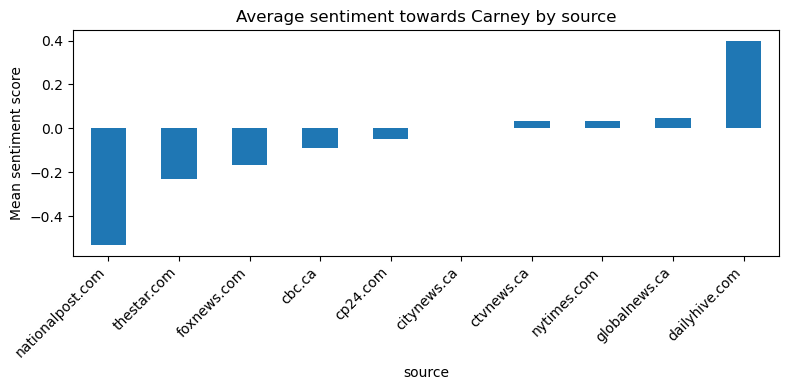

In [ ]:
sent_map = {"Negative": -1, "Neutral": 0, "Positive": 1}
df["sent_score"] = df["sentiment"].map(sent_map)

mean_sent_by_source = df.groupby("source")["sent_score"].mean().sort_values()
mean_sent_by_source
ax = mean_sent_by_source.plot(kind="bar", figsize=(8,4))
ax.set_ylabel("Mean sentiment score")
ax.set_title("Average sentiment towards Carney by source")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

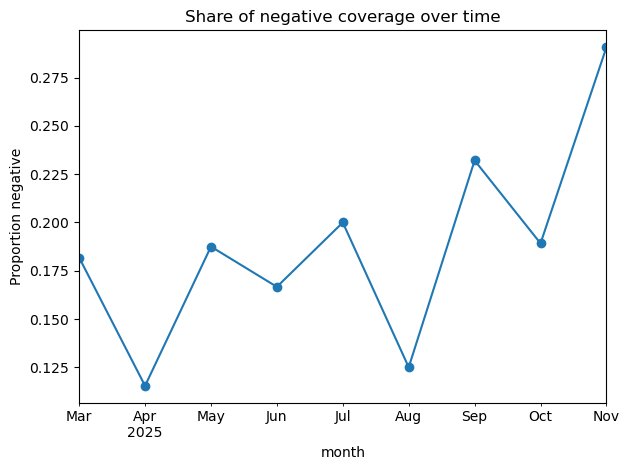

In [ ]:
# overall % negative per month
neg_by_month = (
    df.groupby("month")["sentiment"]
      .value_counts(normalize=True)
      .unstack()
      .fillna(0)
)

neg_by_month["Negative"]

ax = neg_by_month["Negative"].plot(marker="o")
ax.set_ylabel("Proportion negative")
ax.set_title("Share of negative coverage over time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()